In [4]:
# линейная регрессия
# на основе наблюдаемых точек построить гиперплоскость, 
# которая отражает связь между переменными
# лин.регрессия подгоняет данные к прямой линии, пытаясь установить линейную связь.

In [6]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
features, target = make_regression(n_samples=100, n_features=1,n_informative=1, n_targets=1, noise=1, random_state=1)
print(features.shape)
print(target.shape)

(100, 1)
(100,)


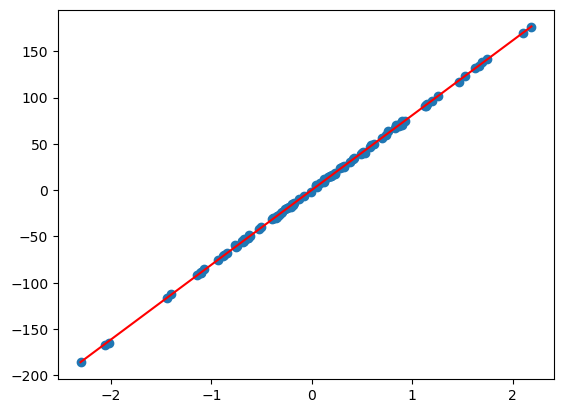

In [18]:
model = LinearRegression().fit(features, target)
plt.scatter(features, target)
x = np.linspace(features.min(), features.max(), 100)
plt.plot(x, model.coef_[0] * x + model.intercept_, color='red')
plt.show()


In [42]:
# простая линейная регрессия. линейная - линейная зависимость.
data = np.array([[1,5], 
                 [2, 7],
                 [3, 7],
                 [4, 10],
                 [5, 11], 
                 [6, 14],
                 [7, 17], 
                 [8, 19], 
                 [9, 22],
                 [10, 28]])
x = data[:, 0]
y = data[:, 1]
n = len(x)
w1 = (n * sum(x[i] * y[i]for i in range(n)) - sum(x[i] for i in range(n)) * sum(y[i] for i in range(n)))
w2 = (n * sum(x[i] ** 2 for i in range(n)) - sum(x[i] for i in range(n))**2)
w_1 = w1/w2
w_0 = (sum(y[i] for i in range(n)) / n) - w_1 * (sum(x[i] for i in range(n))) / n
print(w_1, w_0)

2.4 0.8000000000000007


In [44]:
from numpy.linalg import inv, qr
x_1 = np.vstack([x, np.ones(len(x))]).T
w = inv(x_1.transpose() @ x_1) @ (x_1.transpose() @ y)
print(w)

[2.4 0.8]


In [46]:
Q, R = qr(x_1)
w = inv(R).dot(Q.transpose()).dot(y)
print(w)


[2.4 0.8]


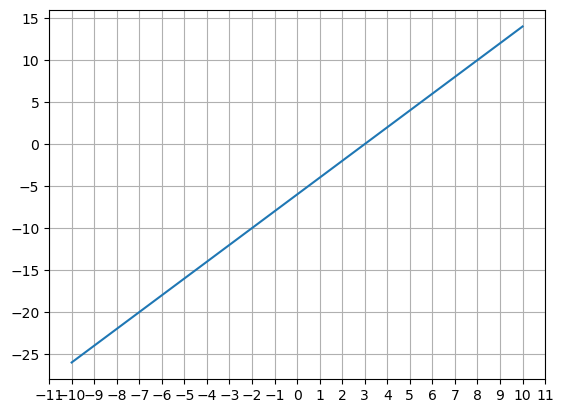

In [62]:
def f(x):
    return (x-3)**2 + 4
def dx_f(x):
    return 2*x - 6


x = np.linspace(-10, 10, 100)
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.plot(x, f(x))
plt.plot(x, dx_f(x))
plt.grid()
plt.show()

In [64]:
import random
L = 0.001
iterations = 100_000
x = random.randint(0, 5)
for i in range(iterations):
    d_x = dx_f(x)
    x -= L * d_x
print(x, f(x))


3.000000000000111 4.0


In [82]:
data = np.array([[1,5], 
                 [2, 7],
                 [3, 7],
                 [4, 10],
                 [5, 11], 
                 [6, 14],
                 [7, 17], 
                 [8, 19], 
                 [9, 22],
                 [10, 28]])
x = data[:, 0]
y = data[:, 1]
L = 0.001
iterations = 1_000
w1 = 0.0
w0 = 0.0
for i in range(iterations):
    D_w0 = 2 * sum(y[i] - w0 - w1 * x[i] for i in range(n))
    D_w1 = 2 * sum(x[i] * (-y[i] - w0 - w1 * x[i]) for i in range(n))
    w1 -= L*D_w1
    w0 -=L*D_w0
print(w1, w0)


1.6089294778152133e+252 2.3110751647046325e+251


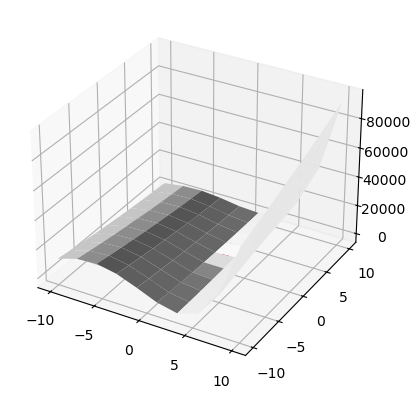

In [100]:
w1 = np.linspace(-10, 10, 10)
w0 = np.linspace(-10, 10, 10)
def E(w1, w0, x, y):
    return sum((y[i] - (w0 + w1 * x)) ** 2 for i in range(len(x)))

W1, W0 = np.meshgrid(w1, w0)
EW = E(W1, W0, x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W1, W0, EW, color='white')
w1_fit = 2.4
w0_fit = 0.8
E_fit= E(w1_fit, w0_fit,x, y)
ax.scatter3D(w1_fit, w0_fit, E_fit, color='red')
plt.show()